In [7]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp

%matplotlib inline


In [2]:
def save_first_frame_png(video_filename: str, output_filename: str) -> None:
    """
    Extracts and saves the first frame of an MP4 video as a PNG image.

    Args:
        video_filename (str): The path to the input MP4 video file.
        output_filename (str): The desired output filename for the PNG image.

    Returns:
        None

    Raises:
        FileNotFoundError: If the video file does not exist.
        IOError: If the video file cannot be opened or the first frame cannot be read.
        Exception: If an unexpected error occurs during the process.

    Example:
        To extract the first frame from an MP4 video named "input_video.mp4" and save it as "first_frame.png":
        >>> save_first_frame_png("input_video.mp4", "first_frame.png")
    """
    try:
        # Check if the video file exists
        if not os.path.isfile(video_filename):
            raise FileNotFoundError(f"The video file '{video_filename}' does not exist.")

        # Open the video file
        video_capture = cv2.VideoCapture(video_filename)

        # Check if the video file was opened successfully
        if not video_capture.isOpened():
            raise IOError("Error: Could not open video file.")

        # Read the first frame from the video
        ret, frame = video_capture.read()

        # Check if a frame was successfully read
        if not ret:
            raise IOError("Error: Could not read the first frame.")

        # Save the first frame as a PNG image
        cv2.imwrite(output_filename, frame)

        # Release the video file
        video_capture.release()
        print(f"The first frame has been saved as {output_filename}")

    except FileNotFoundError as e:
        print(f"FileNotFoundError: {str(e)}")
    except Exception as e:
        print(f"An error occurred: {str(e)}")


save_first_frame_png("20_sec_crop.mp4", "first_20.png")

The first frame has been saved as first_20.png


In [11]:
def extract_first_frame(video_filename: str) -> np.ndarray:
    """
    Extracts the first frame of an MP4 video and returns it as a NumPy array.

    Args:
        video_filename (str): The path to the input MP4 video file.

    Returns:
        np.ndarray: A NumPy array representing the first frame of the video.

    Raises:
        FileNotFoundError: If the video file does not exist.
        IOError: If the video file cannot be opened or the first frame cannot be read.
        Exception: If an unexpected error occurs during the process.

    Example:
        To extract the first frame from an MP4 video named "input_video.mp4":
        >>> first_frame = extract_first_frame("input_video.mp4")
    """
    try:
        # Check if the video file exists
        if not os.path.isfile(video_filename):
            raise FileNotFoundError(f"The video file '{video_filename}' does not exist.")

        # Open the video file
        video_capture = cv2.VideoCapture(video_filename)

        # Check if the video file was opened successfully
        if not video_capture.isOpened():
            raise IOError("Error: Could not open video file.")

        # Read the first frame from the video
        ret, frame = video_capture.read()

        # Check if a frame was successfully read
        if not ret:
            raise IOError("Error: Could not read the first frame.")

        # Release the video file
        video_capture.release()

        # Convert the frame to a NumPy array
        return np.asarray(frame)

    except FileNotFoundError as e:
        print(f"FileNotFoundError: {str(e)}")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Usage example:
first_frame = extract_first_frame("mine_shortened_no_crop.mp4")

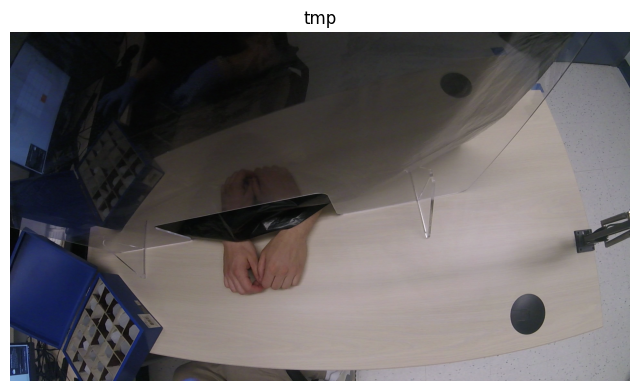

In [4]:
def display_image_with_matplotlib(image: np.ndarray, title: str = "Image") -> None:
    """
    Displays a NumPy image (array) using matplotlib.

    Args:
        image (numpy.ndarray): The image to be displayed (as a NumPy array).
        title (str): The title for the displayed image (default is "Image").

    Returns:
        None
    """
    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)
    plt.title(title)
    plt.axis("off")
    plt.show()

display_image_with_matplotlib(first_frame, "tmp")

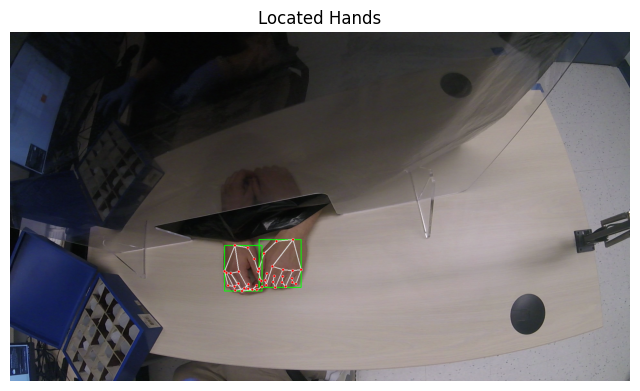

<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [15]:
import cv2
import numpy as np

def detect_hands(image: np.ndarray):
    """
    Detects hands in an image using color-based segmentation.

    Args:
        image (numpy.ndarray): The input image as a NumPy array (RGB format).

    Returns:
        List of tuples: A list of bounding box coordinates (x, y, width, height) for detected hands.
    """
    # Convert the image to the HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    print("hsv_image")
    # Define the lower and upper bounds for the skin color (adjust these values as needed)
    lower_skin = np.array([0, 20, 70], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)

    # Create a binary mask for the skin color
    skin_mask = cv2.inRange(hsv_image, lower_skin, upper_skin)

    # Find contours in the binary mask
    contours, _ = cv2.findContours(skin_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize a list to store bounding boxes of detected hands
    hand_bounding_boxes = []

    # Define a minimum size threshold for detected objects (adjust as needed)
    min_area_threshold = 1000
    print("min area threshold")
    # Iterate through the contours and filter based on area
    for contour in contours:
        if cv2.contourArea(contour) > min_area_threshold:
            # Get the bounding box of the contour
            x, y, w, h = cv2.boundingRect(contour)
            hand_bounding_boxes.append((x, y, w, h))

    return hand_bounding_boxes

# Usage example:
# Detect hands in the first frame
hands = detect_hands(first_frame)

# Print the detected hand bounding boxes (x, y, width, height)
for idx, (x, y, w, h) in enumerate(hands, start=1):
    print(f"Hand {idx}: x={x}, y={y}, width={w}, height={h}")
